In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

### Below example from last exercise

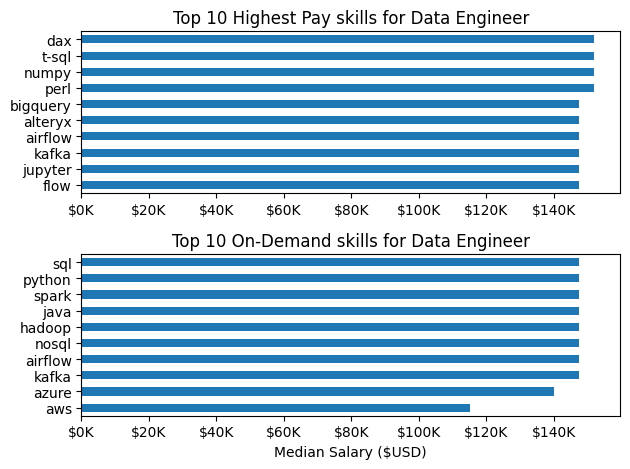

In [4]:
# only get data engineer job in india
df_DE_ind = df[(df['job_title_short'] == 'Data Engineer')
               & (df['job_country'] == 'India')].copy()

# drop NaN values from plotting column
df_DE_ind = df_DE_ind.dropna(subset='salary_year_avg')
df_DE_ind = df_DE_ind.explode('job_skills')
df_DE_ind_grouped = df_DE_ind.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median'))
# first dataframe for TOP PAY
df_DE_ind_top_pay = df_DE_ind_grouped.sort_values(
    by='median_salary', ascending=False).head(10)
# second dataframe for TOP SKILLS
df_DE_ind_top_skill = df_DE_ind_grouped.sort_values(
    by='skill_count', ascending=False).head(10).sort_values(
    by='median_salary', ascending=False)

fig, ax = plt.subplots(2, 1)


df_DE_ind_top_pay.plot(kind='barh', y='median_salary', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title("Top 10 Highest Pay skills for Data Engineer")
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


df_DE_ind_top_skill.plot(
    kind='barh', y='median_salary', ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())  # get the same x axis values
ax[1].set_title('Top 10 On-Demand skills for Data Engineer')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()

* Using `Seaborn`

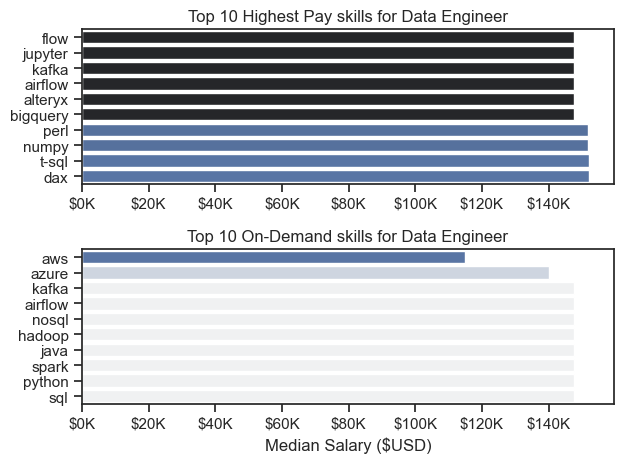

In [18]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

#df_DE_ind_top_pay.plot(kind='barh', y='median_salary', ax=ax[0], legend=False)
sns.barplot(data=df_DE_ind_top_pay, x='median_salary',
            y=df_DE_ind_top_pay.index,hue='median_salary',palette='dark:b',ax=ax[0])
ax[0].legend().remove()
ax[0].invert_yaxis()
ax[0].set_title("Top 10 Highest Pay skills for Data Engineer")
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


#df_DE_ind_top_skill.plot( kind='barh', y='median_salary', ax=ax[1], legend=False)
sns.barplot(data=df_DE_ind_top_skill, x='median_salary',
            y=df_DE_ind_top_skill.index, hue='median_salary',palette='light:b_r', ax=ax[1])
ax[1].legend().remove()
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())  # get the same x axis values
ax[1].set_title('Top 10 On-Demand skills for Data Engineer')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()

### Below example from Histograms topic

Text(0, 0.5, 'Number of jobs')

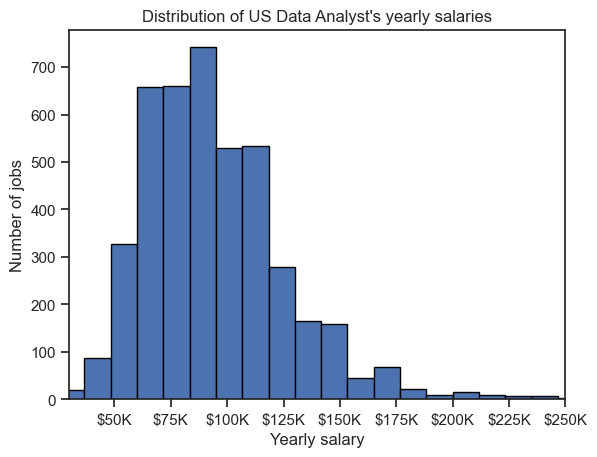

In [25]:
# only get data analyst job in US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst')
               & (df['job_country'] == 'United States')].copy()

df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
#plt.xlim(30000, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of US Data Analyst\'s yearly salaries')
plt.xlabel('Yearly salary')
plt.ylabel('Number of jobs')

* Using `Seaborn` diplot for smoother curves and not hisplot.

Text(12.444444444444445, 0.5, 'Number of jobs')

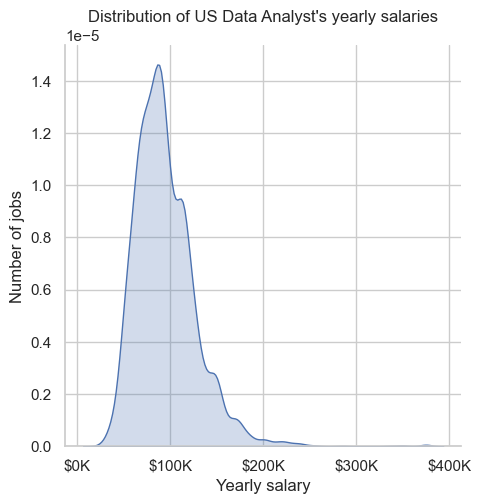

In [30]:
sns.set_theme(style='whitegrid')
sns.displot(data=df_DA_US['salary_year_avg'],kind='kde',fill=True)

ax = plt.gca()
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of US Data Analyst\'s yearly salaries')
plt.xlabel('Yearly salary')
plt.ylabel('Number of jobs')

### Below example from Boxplot topic

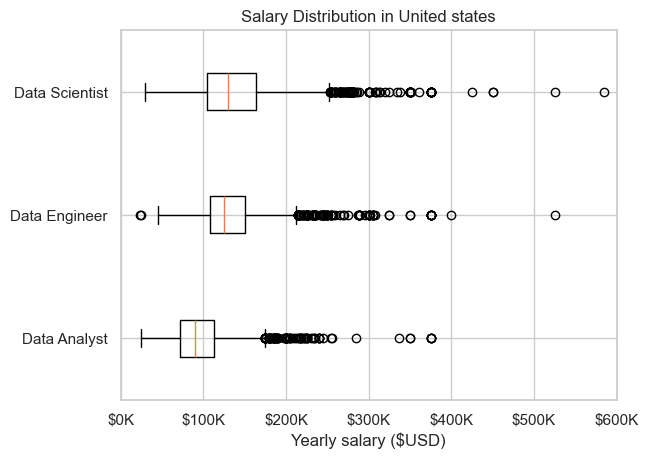

In [31]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) &
           (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset='salary_year_avg')

job_list = [df_US[df_US['job_title_short'] == job_title]
            ['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution in United states')
plt.xlabel('Yearly salary ($USD)')
plt.xlim(0, 600000)

ax = plt.gca()
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

* Using `Seaborn`

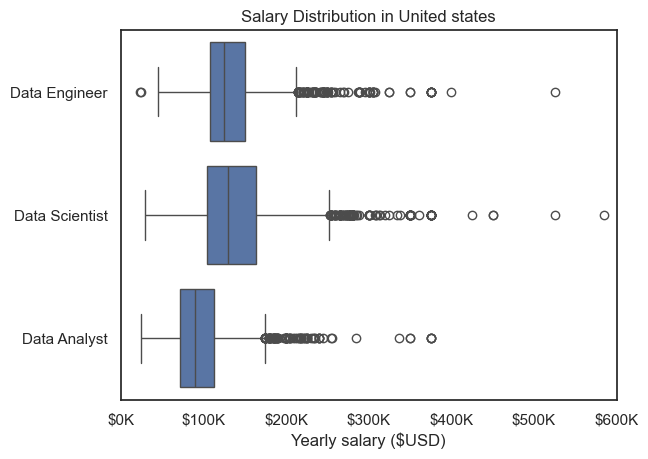

In [34]:
sns.set_theme(style='white')
sns.boxplot(data=df_US,x='salary_year_avg',y='job_title_short')
plt.title('Salary Distribution in United states')
plt.xlabel('Yearly salary ($USD)')
plt.xlim(0, 600000)
plt.ylabel('')

ax = plt.gca()
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()